# Notebook zur Numerischen Quadratur

Benötigte Module für dieses Notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Programmieraufgabe 1 (Zusammengesetzte Quadraturformeln)

Das folgende Notebook benutzt viele der Tools, die Sie im Notebook "Erste Schritte" kennengelernt haben. Wir empfehlen daher, Letzteres zur Hand zu nehmen zur Bearbeitung der hier gestellten Aufgaben.

### Beispielintegral
Wir wählen die einfache Beispielfunktion $f(x)=x + \sin(x)$, um verschiedene Quadraturformeln an dieser zu testen und den Fehler der Approximationen zu bestimmen.

In [2]:
def f(x):
    return x + np.sin(x)

Wir berechnen zunächst den exakten Wert des Integrals über einem Intervall $[a,b]$: 
$$ \int_a^b x + \sin(x) \, \mathrm dx = \left[ \frac12 x^2 - \cos(x) \right]_a^b = \frac12 \left(b^2-a^2\right) + \cos(a) - \cos(b). $$
Von nun an wählen wir konkret $[a,b]=[0,2]$ und berechnen für dieses Intervall den obigen Wert:

In [3]:
a = 0
b = 2
exact = 0.5*(b**2-a**2) + np.cos(a) - np.cos(b)
print(exact)

3.4161468365471426


_Bemerkung:_ Läge der exakte Wert des Integrals zu einer Beispielfunktion nicht vor, so könnte ein "exakter Wert" durch eine sehr feine Zerlegung berechnet und eine Fehleranalyse trotzdem durchgeführt werden.

### Zusammengesetzte Quadraturformeln für eine äquidistante Zerlegung des Intervalls $[a,b]$

Wir verwenden eine äquidistante Zerlegung des Intervalls $[a,b]$ in $N\in\mathbb{N}$ Teilintervalle, d.h.
$$ h = \frac{b-a}{N} \quad \text{und} \quad x_n = a + nh, \quad n = 0,...,N.$$

Damit zerlegen wir das Integral wie üblich über
$$ \int_a^b f(x) \, \mathrm{d}x = \sum_{n=1}^N \int_{x_{n-1}}^{x_n} f(x) \, \mathrm{d}x = \sum_{n=1}^N h \int_0^1 f(x_{n-1} + t h) \, \mathrm{d}t $$
und approximieren die verbleibenden Integrale über dem Intervall $[0,1]$ mit einer Quadraturformel (z.B. Rechtecksregel/Mittelpunktsregel/...).

**(a) Implementieren Sie eine Prozedur mit dem Namen `rechteckZusammen`, die die zusammengesetzte Rechteckregel für eine Funktion $f$ zu einer äquidistanten Zerlegung des Intervalls $[a,b]$ in $N$ Teilintervalle anwendet und das Ergebnis zurückgibt. Die Funktion $f$ sowie die Zahlen $a$, $b$ und $N$ sollen der Prozedur als Argumente übergeben werden. Testen Sie Ihre Prozedur, indem Sie diese auf das obige Integral unter Verwendung von $N=100$ Teilintervallen anwenden und dann überprüfen, ob das Ergebnis ungefähr mit dem exakten Wert des Integrals übereinstimmt.**

In [4]:
# äquidistante zusammengesetzte Rechteckregel
def rechteckZusammen(f, a, b, N):
    h = (b-a)/N
    x = np.linspace(a, b, N+1)
    return h * np.sum(f(x[:-1]))

In [5]:
rechteckZusammen(f,0,2,100)

np.float64(3.387006657069632)

**(b) Schreiben Sie analog zu Teil (a) drei Prozeduren `mittelpunktZusammen`, `trapezZusammen` und `simpsonZusammen`, in denen jeweils das Ergebnis der zusammengesetzten Mittelpunktsregel, Trapezregel und Simpsonregel berechnet wird.**

In [6]:
# äquidistante zusammengesetzte Mittelpunktsregel
def mittelpunktZusammen(f, a, b, N):
    h = (b-a)/N
    x = np.linspace(a+0.5*h, b-0.5*h, N)
    return h * np.sum(f(x))

In [7]:
mittelpunktZusammen(f,0,2,100)

np.float64(3.416170439269783)

In [8]:
# äquidistante zusammengesetzte Trapezregel
def trapezZusammen(f, a, b, N):
    h = (b-a)/N
    x = np.linspace(a, b, N+1)
    return h * (1/2 * f(a) + 
                1 * np.sum(f(x[1:-1])) + 
                1/2 * f(b))
    # alternativ (aber weniger effizient):
    #return 1/2*h* ( np.sum(f(X[0:-1])) + np.sum(f(X[1:])) )

In [9]:
trapezZusammen(f,0,2,100)

np.float64(3.416099631337888)

In [10]:
# äquidistante zusammengesetzte Simpsonregel
def simpsonZusammen(f, a, b, N):
    h = (b-a)/N
    x = np.linspace(a, b, N+1)
    M = np.linspace(a+0.5*h, b-0.5*h, N)
    return h * (1/6 * f(a) + 
                2/6 * np.sum(f(x[1:-1])) + 
                4/6 * np.sum(f(M)) + 
                1/6 * f(b))

In [11]:
simpsonZusammen(f,0,2,100)

np.float64(3.4161468366258174)

### Numerische Fehleranalyse

Nun wollen wir den Fehler der verschiedenen zusammengesetzten Quadraturformeln in Abhängigkeit des Stützstellenabstands $h$, also für verschiedene Anzahlen an Teilintervallen $N$, beobachten. Gehen Sie dazu folgendermaßen vor:


**(c) Schreiben Sie ein Programm, dass die zusammengesetzte Rechteckregel für die gegebene Funktion $f$ und das gegebene Intervall $[a,b]$ für $N=2^k$, $k=1,...,8$ auswertet, dann jeweils den Fehler zum in `exact` gespeicherten exakten Wert des Integrals berechnet, und die Fehler für die verschiedenen Werte von $N$ in einem Vektor `errors_re` speichert. Speichern Sie außerdem alle Werte von $N$ in einem Vektor `N_vec`.**

**Ergänzen Sie Ihr Programm anschließend so, dass es drei weitere Vektoren `errors_tr`, `errors_mp` und `errors_si` berechnet, die die Fehler der zusammengesetzten Mittelpunktsregel, Trapezregel und Simpsonregel für die verschiedenen Werte von $N$ enthält.**

In [12]:
K = 8
N_vec = np.zeros((K,1))
error_re = np.zeros((K,1))
error_tr = np.zeros((K,1))
error_mp = np.zeros((K,1))
error_si = np.zeros((K,1))

for k in range(K):
    N = 2**(1+k)
    N_vec[k] = N
    re =    rechteckZusammen(f, a, b, N)
    tr = mittelpunktZusammen(f, a, b, N)
    mp =      trapezZusammen(f, a, b, N)  
    si =     simpsonZusammen(f, a, b, N)   
    error_re[k] = np.abs(exact - re)
    error_tr[k] = np.abs(exact - tr)
    error_mp[k] = np.abs(exact - mp)
    error_si[k] = np.abs(exact - si)

Sei $e(h)$ der Fehler einer zusammengesetzten Quadraturformel in Abhängigkeit der Intervallbreite $h$. Aus der Vorlesung wiss wir, dass $e(h) \leq Ch^p$ für ein $p\in\mathbb{N}$ und eine Konstante $C$ gilt. Anwenden des Logarithmus auf beiden Seiten liefert dann
$$ log(𝑒(ℎ)) \leq log(𝐶)+𝑝 \cdot log(ℎ). $$
Wenn wir also den Logarithmus des Fehlers $log(𝑒(ℎ))$ über den Logarithmus der Intervallbreite $log(ℎ)$ darstellen, dann entspricht die rechte Seite einer Geraden mit Steigung $p$. Der Fehler sollte also durch eine Gerade beschränkt sein, an deren Steigung wir die Konvergenzordnung $p$ ablesen können. 

Genau dazu ist der Befehl `plt.loglog` da, der wie der `plt.plot` Befehl funktioniert, aber die Werte entlang der $x$- und $y$-Achse logarithmisch aufträgt. Zum Ablesen der Steigungen eignen sich Referenzgeraden, die dementsprechend z.B. folgendermaßen erzeugt werden können:

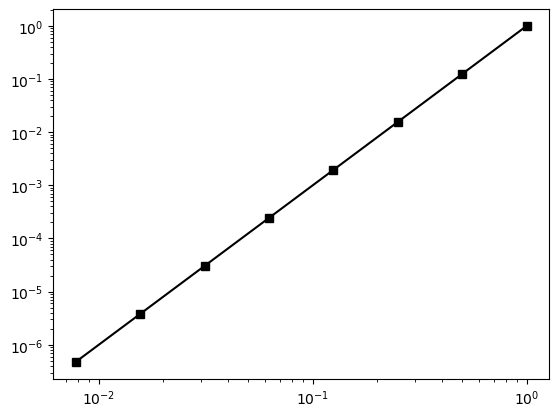

In [13]:
p = 3
C = 1
h_vec = (b-a)/N_vec
plt.loglog(h_vec, C*h_vec**p, "ks-")
plt.show()

Die Konstante $C$ bestimmt den $y$-Achsenabschnitt der Gerade. Über den Wert von $C$ lassen sich die Referenzgeraden dementsprechend nach oben oder nach unten verschieben, sodass sie gut mit den Fehlerlinien vergleichbar sind.

**(d) Ergänzen Sie das folgende Programm so, dass der Fehler der zusammengesetzten Rechteckregel in Abhängigkeit der Schrittweite $h$ in logarithmischen Achsen zusammen mit Referenzgeraden mit verschiedenen Steigungen geplottet wird. Ergänzen Sie anschließend auch die anderen Quadraturformeln und passen Sie die Referenzgeraden so an, dass sich Aussagen über die beobachteten Fehler formulieren lassen. Erklären Sie das Bild.**

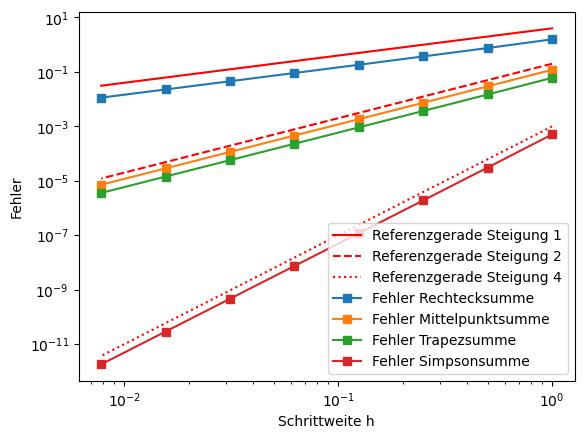

In [14]:
# Plot einer "Referenzgeraden" mit Steigung 1, 2 und 4
h_vec = (b-a)/N_vec
plt.loglog(h_vec, 4*(h_vec), "r", label="Referenzgerade Steigung 1")
plt.loglog(h_vec, 1/5*(h_vec)**2, "r--", label="Referenzgerade Steigung 2")
plt.loglog(h_vec, 1/1000*(h_vec)**4, "r:", label="Referenzgerade Steigung 4")

# Plot der Fehler der zusammengesetzten Quadraturformeln 
plt.loglog(h_vec, error_re, "-s", label="Fehler Rechtecksumme")
plt.loglog(h_vec, error_mp, "-s", label="Fehler Mittelpunktsumme")
plt.loglog(h_vec, error_tr, "-s", label="Fehler Trapezsumme")
plt.loglog(h_vec, error_si, "-s", label="Fehler Simpsonsumme")
plt.legend()
plt.xlabel("Schrittweite h")
plt.ylabel("Fehler")
plt.show()